In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
datos = pd.read_excel('Facturación.xlsx')

In [3]:
# Obtener una primera información básica
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382436 entries, 0 to 382435
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Código Episodio            382436 non-null  int64         
 1   Valor neto                 382436 non-null  float64       
 2   Mon.                       382436 non-null  object        
 3   Creado el                  382436 non-null  datetime64[ns]
 4   Aseguradora                382436 non-null  object        
 5   Clase episodio             382436 non-null  object        
 6   Centro de Responsabilidad  382436 non-null  int64         
 7   Género                     382436 non-null  object        
 8   Población                  382436 non-null  object        
 9   Edad                       382157 non-null  object        
 10  Causa Externa              112259 non-null  object        
 11  Pais de Nacimiento         382272 non-null  object  

In [4]:
# Remplazar inf con None
datos_ = datos.replace([np.inf, -np.inf], None)

In [5]:
datos_.isna().sum()

Código Episodio                   0
Valor neto                        0
Mon.                              0
Creado el                         0
Aseguradora                       0
Clase episodio                    0
Centro de Responsabilidad         0
Género                            0
Población                         0
Edad                            279
Causa Externa                270177
Pais de Nacimiento              164
dtype: int64

In [6]:
 # Contar filas con almenos un dato nulo
print(r'Filas con al menos un valor nulo:', datos_.isna().any(axis=1).sum())

Filas con al menos un valor nulo: 270240


In [7]:
# Renombrar algunas variables
datos_ = datos_.rename(columns={'Valor neto': 'Ingreso', 'Mon.': 'Moneda', 
                      'Código Episodio':'Código Paciente', 'Creado el': 'Fecha',
                              'Centro de Responsabilidad': 'Centro'})

In [8]:
# Un primer vistazo a la base
datos_

,Código Paciente,Ingreso,Moneda,Fecha,Aseguradora,Clase episodio,Centro,Género,Población,Edad,Causa Externa,Pais de Nacimiento
0,4230800,238650.0,COP,2022-01-01,"SEGUROS DE VIDA SURAMERICANA, POLIZA JUVENIL.A...",Ambulatorio,530101,M,RETIRO,14 A,Otro accidente fortuito,colombiana
1,4241800,29735371.5,COP,2022-01-01,EPS SURA,Hospitalizado,530718,F,GUARNE,85 A,Enfermedad General,colombiana
2,4241800,19312.5,COP,2022-01-01,EPS SURA,Hospitalizado,530718,F,GUARNE,85 A,Enfermedad General,colombiana
3,4254640,17203698.0,COP,2022-01-01,EPS SURA,Hospitalizado,530718,F,RIONEGRO,41 A,Enfermedad General,colombiana
4,4254640,43656.0,COP,2022-01-01,EPS SURA,Hospitalizado,530718,F,RIONEGRO,41 A,Enfermedad General,colombiana
...,...,...,...,...,...,...,...,...,...,...,...,...
382431,5148906,110700.0,COP,2024-03-31,PARTICULARES,Ambulatorio,530809,F,ENVIGADO,09:00:00,Enfermedad General,colombiana
382432,5148907,120666.0,COP,2024-03-31,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,M,MARINILLA,24 A,Enfermedad General,colombiana
382433,5148907,110700.0,COP,2024-03-31,PARTICULARES,Ambulatorio,530101,M,MARINILLA,24 A,Enfermedad General,colombiana
382434,5148909,25747.5,COP,2024-03-31,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,F,RETIRO,41 A,Enfermedad General,colombiana


In [9]:
# La columna 'Edad' tiene formato object y además sus valores incluyen letras
# Vamos a eliminar las letras y dejar solo valores numéricos
datos_['Edad'] = datos_['Edad'].str.replace(r'\D', '', regex=True)

In [10]:
# Revisamos el tipo de datos 
print(r'tipo de dato "Edad":',datos_['Edad'].dtypes)

tipo de dato "Edad": object


In [11]:
# Convertir el tipo de datos a floats
datos_['Edad'] = pd.to_numeric(datos_['Edad'], errors='coerce')
print(r'tipo de dato "Edad":',datos_['Edad'].dtypes)

tipo de dato "Edad": float64


In [12]:
# Contar el número de valores nulos resultantes
edad_nulos = datos_['Edad'].isna().sum()
num_obs = len(datos_['Edad'])
pct_nulos = edad_nulos/num_obs
print(f'Total datos nulos en columna "Edad", {edad_nulos}')
print(r"Porcentaje de valores nulos de 'Edad':", round(pct_nulos * 100),"%")

Total datos nulos en columna "Edad", 26783
Porcentaje de valores nulos de 'Edad': 7 %


#### Como el porcentaje es pequeño y la base es muy grande (más de 350000 observaciones), decido eliminar las filas donde 'Edad' sea un valor nulo

In [13]:
# Eliminamos y comprobamos la dimensión final
datos_ = datos_.dropna(subset=['Edad'], how='any')
datos_.shape

(355653, 12)

In [14]:
# 'Edad', de float a int 
# 'Centro' y 'Código Paciente', de int a object
# y revisar datos nulo
datos_ = datos_.astype({'Edad': 'int', 'Centro': 'object', 'Código Paciente': 'object'})
print(r'tipo de datos "Edad":',datos_['Edad'].dtypes)
print(r'tipo de datos "Centro":',datos_['Centro'].dtypes)
print(r'tipo de datos "Código Paciente":',datos_['Código Paciente'].dtypes)
print()
print(r'Total datos nulos en "Edad":', datos_['Edad'].isna().sum())
print(r'Total datos nulos en "Centro":', datos_['Centro'].isna().sum())
print(r'Total datos nulos en "Código Paciente":', datos_['Código Paciente'].isna().sum())

tipo de datos "Edad": int32
tipo de datos "Centro": object
tipo de datos "Código Paciente": object

Total datos nulos en "Edad": 0
Total datos nulos en "Centro": 0
Total datos nulos en "Código Paciente": 0


In [15]:
# Contar el numero de observaciones repetidas
datos_.duplicated().sum()
print(r'Observaciones duplicadas:', datos_.duplicated().sum())

Observaciones duplicadas: 14


In [16]:
# Eliminar duplicados y comprobar que no quede ninguno
datos_ = datos_.drop_duplicates()
print(r'Observaciones duplicadas:', datos_.duplicated().sum())

Observaciones duplicadas: 0


 #### Ya vimos arriba que 'Causa externa' tiene un número enorme de valores nulos. 
#### Vamos a calcular el porcentaje de valores nulos de 'Causa Externa' respecto del total

In [17]:
ce_nulos = datos_['Causa Externa'].isna().sum()
num_obs = len(datos_['Causa Externa'])
pct_nulos = ce_nulos/num_obs
print(r"Porcentaje de valores nulos de 'Causa Externa':", round(pct_nulos * 100),"%")

Porcentaje de valores nulos de 'Causa Externa': 73 %


#### Tenemos el caso opuesto. Es un porcentaje inmenso. Por lo tanto se decide no incluir la variable

In [18]:
datos_ = datos_.drop('Causa Externa', axis=1)

#### La variable 'Moneda' toma dos valores como veremos a continuación

In [19]:
datos_['Moneda'].value_counts()

Moneda
COP    355590
USD        49
Name: count, dtype: int64

#### El objetivo es reducirla a un mismo valor (COP). PERO antes es necesario recalcular los valores de 'Ingreso' correspondientes a los valores de USD

In [20]:
datos_['Ingreso'] = np.where(datos_['Moneda'] == 'USD', 
                         datos_['Ingreso'] * 4000, datos_['Ingreso'])

In [21]:
# Convertimos todos los valores COP
datos_['Moneda'] = 'COP'

In [22]:
# Contar datos nulos por columna
datos_.isnull().sum()

Código Paciente         0
Ingreso                 0
Moneda                  0
Fecha                   0
Aseguradora             0
Clase episodio          0
Centro                  0
Género                  0
Población               0
Edad                    0
Pais de Nacimiento    154
dtype: int64

#### 'País de Nacimiento' tiene un porcentaje pequeño de valores nulos, Procedo a eliminar las filas donde aquella variable es nula

In [23]:
datos_ = datos_.dropna(subset=['Pais de Nacimiento'], how='any')
datos_.shape

(355485, 11)

#### Voy a crear una variable que se llamará Grupo de Edad a partir de la variable Edad, por eso conviene  hacer un histograma de la misma

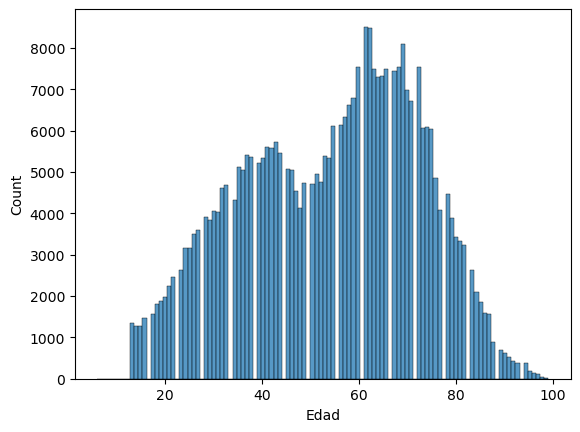

In [24]:
sns.histplot(data=datos_, x='Edad')
plt.show()

In [25]:
# Clasificar las edades en grupos
datos_['Grupo de edad'] = None
datos_['Grupo de edad'] = np.where((0 <= datos_['Edad'])
                                   & (datos_['Edad'] <= 12), 'Niño', datos_['Grupo de edad'])

datos_['Grupo de edad'] = np.where((13 <= datos_['Edad'])
                                   & (datos_['Edad'] <= 19), 'Adolescente', datos_['Grupo de edad'])

datos_['Grupo de edad'] = np.where((20 <= datos_['Edad'])
                                   & (datos_['Edad'] <= 39), 'Adulto Joven', datos_['Grupo de edad'])

datos_['Grupo de edad'] = np.where((40 <= datos_['Edad'])
                                   & (datos_['Edad'] <= 59), 'Adulto', datos_['Grupo de edad'])

datos_['Grupo de edad'] = np.where((60 <= datos_['Edad']), 'Adulto Mayor', datos_['Grupo de edad'])



In [26]:
# Quitar variables 'Edad', 'Moneda', 'Código Paciente'
datos_ = datos_.drop(['Edad', 'Código Paciente', 'Moneda'], axis=1)
datos_

,Ingreso,Fecha,Aseguradora,Clase episodio,Centro,Género,Población,Pais de Nacimiento,Grupo de edad
0,238650.0,2022-01-01,"SEGUROS DE VIDA SURAMERICANA, POLIZA JUVENIL.A...",Ambulatorio,530101,M,RETIRO,colombiana,Adolescente
1,29735371.5,2022-01-01,EPS SURA,Hospitalizado,530718,F,GUARNE,colombiana,Adulto Mayor
2,19312.5,2022-01-01,EPS SURA,Hospitalizado,530718,F,GUARNE,colombiana,Adulto Mayor
3,17203698.0,2022-01-01,EPS SURA,Hospitalizado,530718,F,RIONEGRO,colombiana,Adulto
4,43656.0,2022-01-01,EPS SURA,Hospitalizado,530718,F,RIONEGRO,colombiana,Adulto
...,...,...,...,...,...,...,...,...,...
382429,109950.0,2024-03-31,PARTICULARES,Ambulatorio,530809,F,ENVIGADO,colombiana,Adolescente
382432,120666.0,2024-03-31,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,M,MARINILLA,colombiana,Adulto Joven
382433,110700.0,2024-03-31,PARTICULARES,Ambulatorio,530101,M,MARINILLA,colombiana,Adulto Joven
382434,25747.5,2024-03-31,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,F,RETIRO,colombiana,Adulto


In [27]:
# Crear columnas 'Año', 'Mes' y 'Semana'
datos_['Año'] = datos_['Fecha'].dt.year
datos_['Mes'] = datos_['Fecha'].dt.month
datos_['Semana'] = datos_['Fecha'].dt.isocalendar().week

datos_ = datos_[['Ingreso', 'Fecha', 'Año', 'Mes', 'Semana','Aseguradora', 'Clase episodio', 
                 'Centro', 'Género', 'Población', 'Pais de Nacimiento', 
                 'Grupo de edad']]

datos_

,Ingreso,Fecha,Año,Mes,Semana,Aseguradora,Clase episodio,Centro,Género,Población,Pais de Nacimiento,Grupo de edad
0,238650.0,2022-01-01,2022,1,52,"SEGUROS DE VIDA SURAMERICANA, POLIZA JUVENIL.A...",Ambulatorio,530101,M,RETIRO,colombiana,Adolescente
1,29735371.5,2022-01-01,2022,1,52,EPS SURA,Hospitalizado,530718,F,GUARNE,colombiana,Adulto Mayor
2,19312.5,2022-01-01,2022,1,52,EPS SURA,Hospitalizado,530718,F,GUARNE,colombiana,Adulto Mayor
3,17203698.0,2022-01-01,2022,1,52,EPS SURA,Hospitalizado,530718,F,RIONEGRO,colombiana,Adulto
4,43656.0,2022-01-01,2022,1,52,EPS SURA,Hospitalizado,530718,F,RIONEGRO,colombiana,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...
382429,109950.0,2024-03-31,2024,3,13,PARTICULARES,Ambulatorio,530809,F,ENVIGADO,colombiana,Adolescente
382432,120666.0,2024-03-31,2024,3,13,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,M,MARINILLA,colombiana,Adulto Joven
382433,110700.0,2024-03-31,2024,3,13,PARTICULARES,Ambulatorio,530101,M,MARINILLA,colombiana,Adulto Joven
382434,25747.5,2024-03-31,2024,3,13,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,F,RETIRO,colombiana,Adulto


In [28]:
# Hay desfases entre semanas y años al comienzo y al final de cada año
# Lo correjo cambiando el año

# Si la semana corresponde al año anterior cambio el año
datos_['Año'] = np.where((datos_['Mes']==1) & (datos_['Semana']==52),
                                datos_['Año'] - 1, datos_['Año'])

datos_['Año'] = np.where((datos_['Mes']==12) & (datos_['Semana']==1),
                                datos_['Año'] + 1, datos_['Año'])

# Reiniciar el índice
datos_ = datos_.reset_index(drop=True)

# Convertir Semana a tipo int
datos_['Semana'] = datos_['Semana'].astype(int)

In [29]:
# revisar 
datos_

,Ingreso,Fecha,Año,Mes,Semana,Aseguradora,Clase episodio,Centro,Género,Población,Pais de Nacimiento,Grupo de edad
0,238650.0,2022-01-01,2021,1,52,"SEGUROS DE VIDA SURAMERICANA, POLIZA JUVENIL.A...",Ambulatorio,530101,M,RETIRO,colombiana,Adolescente
1,29735371.5,2022-01-01,2021,1,52,EPS SURA,Hospitalizado,530718,F,GUARNE,colombiana,Adulto Mayor
2,19312.5,2022-01-01,2021,1,52,EPS SURA,Hospitalizado,530718,F,GUARNE,colombiana,Adulto Mayor
3,17203698.0,2022-01-01,2021,1,52,EPS SURA,Hospitalizado,530718,F,RIONEGRO,colombiana,Adulto
4,43656.0,2022-01-01,2021,1,52,EPS SURA,Hospitalizado,530718,F,RIONEGRO,colombiana,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...
355480,109950.0,2024-03-31,2024,3,13,PARTICULARES,Ambulatorio,530809,F,ENVIGADO,colombiana,Adolescente
355481,120666.0,2024-03-31,2024,3,13,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,M,MARINILLA,colombiana,Adulto Joven
355482,110700.0,2024-03-31,2024,3,13,PARTICULARES,Ambulatorio,530101,M,MARINILLA,colombiana,Adulto Joven
355483,25747.5,2024-03-31,2024,3,13,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,F,RETIRO,colombiana,Adulto


In [30]:
# Guardar el DataFrame como un archivo Excel
# datos_.to_excel('base_limpia.xlsx', index=False)

# Quitar columna Fecha
datos_ = datos_.drop('Fecha', axis=1)

#### A las siguientes cinco variables se le hará un análisis del conteo de sus valores: Aseguradora, Clase episodio, Centro de Responsabilidad, Población, País de Nacimiento. La idea es preparar el terreno para crear variables con one-hot-encoding 

In [31]:
# Comprobemos que 'Género' y 'Clase episodio' sean variables categóricas binarias
print(datos_['Género'].value_counts())
print()
print(datos_['Clase episodio'].value_counts())

Género
F    192210
M    163275
Name: count, dtype: int64

Clase episodio
Ambulatorio      327992
Hospitalizado     27493
Name: count, dtype: int64


#### Las otras variables categóricas tienen cada una muchos valores, que hay que reducir a unos pocos

In [32]:
# Crear función que muestre el porcentaje acumulado de observaciones 
# cuando de una determinada variable categórica se eligen solo sus valores más frecuentes
def suma_lista(lst):
    suma = 0
    mi_lst = []
    for i in lst:
        suma = i + suma
        mi_lst.append(suma)
    return [x/mi_lst[-1] for x in mi_lst]

In [33]:
# Crear listas en orden descendente de los valores más frecuentes

aseg_ = datos_['Aseguradora'].value_counts().index.tolist()
c_r_ = datos_['Centro'].value_counts().index.tolist()
pob_ = datos_['Población'].value_counts().index.tolist()
pais_ = datos_['Pais de Nacimiento'].value_counts().index.tolist()

In [34]:
# Crear listas en orden descendente del número de apariciones de los valores más frecuentes

aseg_vc = datos_['Aseguradora'].value_counts().values.tolist()
c_r_vc = datos_['Centro'].value_counts().values.tolist()
pob_vc = datos_['Población'].value_counts().values.tolist()
pais_vc = datos_['Pais de Nacimiento'].value_counts().values.tolist()

In [35]:
# Aplicar función que muestre la frecuencia acumulada de los valores más frecuentes
# de las cuatro variables estudiadas
lst_vc = [aseg_vc, c_r_vc, pob_vc, pais_vc]
lst_ = ['Aseguradora', 'Centro', 'Población', 'Pais de Nacimiento']

for i,j in zip(lst_, lst_vc):
    print(i, ":", suma_lista(j)[:7])
    print()
    

Aseguradora : [0.3320337004374306, 0.4983051324247155, 0.6113113070875001, 0.6955370831399356, 0.7593935046485787, 0.7940391296397878, 0.8254722421480513]

Centro : [0.24520865859318958, 0.43656694375290095, 0.593746571585299, 0.7074391324528461, 0.7911698102592233, 0.8637860950532371, 0.9337524790075531]

Población : [0.35160414644781074, 0.47328297959126264, 0.5711661532835423, 0.649684234215227, 0.7199459892822482, 0.7649605468585172, 0.8090580474562921]

Pais de Nacimiento : [0.9929701675176168, 0.9958929350042899, 0.9967593569348918, 0.9971222414447867, 0.9974823128964654, 0.997805814591333, 0.9980561767725783]



#### Vamos a tomar un criterio, vamos a elegir de cada una de las cuatro variables categóricas de arriba los primeros valores en acumular al menos el 75% de las observaciones. Los valores que aporten menos del 25% de la frecuencia de aparición, quedarán en un mismo saco como 'otros'

In [36]:
# Listas depuradas
aseg_list = datos_['Aseguradora'].value_counts().index.tolist()[:5]
cr_list = datos_['Centro'].value_counts().index.tolist()[:5]
pob_list = datos_['Población'].value_counts().index.tolist()[:6]
pais_list = datos_['Pais de Nacimiento'].value_counts().index.tolist()[:1]

In [37]:
# Los valores por fuera de las listas depuradas quedan como 'otro'
# De lo contrario quedan igual
datos_.loc[~datos_['Aseguradora'].isin(aseg_list), 'Aseguradora'] = 'Otra Aseg'
datos_.loc[~datos_['Centro'].isin(cr_list), 'Centro'] = 'Otro C_R'
datos_.loc[~datos_['Población'].isin(pob_list), 'Población'] = 'Otra Pob'
datos_.loc[~datos_['Pais de Nacimiento'].isin(pais_list), 'Pais de Nacimiento'] = 'Otro Pais'


In [38]:
datos_['Centro'].value_counts()

Centro
530201      87168
Otro C_R    74236
530101      68025
530301      55875
530809      40416
530801      29765
Name: count, dtype: int64

In [39]:
# Ver resultado
datos_

,Ingreso,Año,Mes,Semana,Aseguradora,Clase episodio,Centro,Género,Población,Pais de Nacimiento,Grupo de edad
0,238650.0,2021,1,52,Otra Aseg,Ambulatorio,530101,M,RETIRO,colombiana,Adolescente
1,29735371.5,2021,1,52,EPS SURA,Hospitalizado,Otro C_R,F,GUARNE,colombiana,Adulto Mayor
2,19312.5,2021,1,52,EPS SURA,Hospitalizado,Otro C_R,F,GUARNE,colombiana,Adulto Mayor
3,17203698.0,2021,1,52,EPS SURA,Hospitalizado,Otro C_R,F,RIONEGRO,colombiana,Adulto
4,43656.0,2021,1,52,EPS SURA,Hospitalizado,Otro C_R,F,RIONEGRO,colombiana,Adulto
...,...,...,...,...,...,...,...,...,...,...,...
355480,109950.0,2024,3,13,PARTICULARES,Ambulatorio,530809,F,Otra Pob,colombiana,Adolescente
355481,120666.0,2024,3,13,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,M,Otra Pob,colombiana,Adulto Joven
355482,110700.0,2024,3,13,PARTICULARES,Ambulatorio,530101,M,Otra Pob,colombiana,Adulto Joven
355483,25747.5,2024,3,13,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530101,F,RETIRO,colombiana,Adulto


#### Crear one-hot-encoding

In [40]:
datos_ohe = pd.get_dummies(datos_, columns=['Aseguradora', 'Clase episodio', 'Género', 'Pais de Nacimiento', 
                                'Grupo de edad', 'Centro', 'Población']).replace({True:1, False:0})

In [41]:
# Ver dataframe
datos_ohe

,Ingreso,Año,Mes,Semana,Aseguradora_COOMEVA MEDICINA PREPAGADA S.A.,Aseguradora_EPS SURA,Aseguradora_NUEVA EMPRESA PROMOTORA DE SALU S.A.,Aseguradora_Otra Aseg,Aseguradora_PARTICULARES,"Aseguradora_SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O CLA",...,Centro_530801,Centro_530809,Centro_Otro C_R,Población_CARMEN DE VIBORAL,Población_GUARNE,Población_LA CEJA,Población_MEDELLIN,Población_Otra Pob,Población_RETIRO,Población_RIONEGRO
0,238650.0,2021,1,52,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,29735371.5,2021,1,52,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,19312.5,2021,1,52,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,17203698.0,2021,1,52,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,43656.0,2021,1,52,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355480,109950.0,2024,3,13,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
355481,120666.0,2024,3,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
355482,110700.0,2024,3,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
355483,25747.5,2024,3,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Agrupar
lista_columnas = datos_ohe.columns.tolist()
lista_columnas.remove('Año')
lista_columnas.remove('Mes')
lista_columnas.remove('Semana')


df_grouped = datos_ohe.groupby(['Año', 'Semana'])[lista_columnas].sum().reset_index()

In [43]:
# Renombrar y ver base con frecuencia semanal
df_grouped = df_grouped.rename(columns={'Ingreso': 'Ingreso SEMANAL'})
df_grouped

,Año,Semana,Ingreso SEMANAL,Aseguradora_COOMEVA MEDICINA PREPAGADA S.A.,Aseguradora_EPS SURA,Aseguradora_NUEVA EMPRESA PROMOTORA DE SALU S.A.,Aseguradora_Otra Aseg,Aseguradora_PARTICULARES,"Aseguradora_SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O CLA",Clase episodio_Ambulatorio,...,Centro_530801,Centro_530809,Centro_Otro C_R,Población_CARMEN DE VIBORAL,Población_GUARNE,Población_LA CEJA,Población_MEDELLIN,Población_Otra Pob,Población_RETIRO,Población_RIONEGRO
0,2021,52,4.932225e+08,5,56,17,43,265,32,385,...,0,0,32,5,28,8,134,91,25,127
1,2022,1,3.205825e+09,154,392,244,741,1251,387,2946,...,604,275,785,135,256,225,530,689,209,1125
2,2022,2,3.402301e+09,152,321,306,671,984,298,2503,...,439,128,775,118,203,164,373,677,213,984
3,2022,3,4.119595e+09,174,280,344,816,1080,432,2865,...,400,202,975,117,197,191,437,754,269,1161
4,2022,4,4.644148e+09,193,312,338,779,1061,391,2794,...,356,291,881,138,252,190,443,817,246,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2024,9,9.688583e+09,262,329,466,832,1169,628,3346,...,180,577,1022,141,267,281,454,885,399,1259
114,2024,10,5.343838e+09,241,216,442,736,1057,490,3005,...,201,222,794,135,265,241,335,724,276,1206
115,2024,11,1.160749e+10,266,324,483,833,1233,670,3512,...,306,312,727,157,291,239,401,895,424,1402
116,2024,12,8.139334e+09,175,299,506,938,1172,594,3437,...,183,492,781,152,269,271,398,927,357,1310


#### Agreguemos fechas tipo yyyy-mm-dd

In [44]:
# Definir la fecha de inicio y el número de períodos
fecha_inicio = '2021-12-26'  # Fecha de inicio
periodos = 118                # Número de períodos
frecuencia = 'W'             # Frecuencia: 'D' para diario, 'W' para semanal, 'M' para mensual

# Crear un rango de fechas
rango_fechas = pd.date_range(start=fecha_inicio, periods=periodos, freq=frecuencia)

# Crear un DataFrame con el rango de fechas
df = pd.DataFrame(rango_fechas, columns=['Fecha'])

# Mostrar el DataFrame
print(df['Fecha'])


0     2021-12-26
1     2022-01-02
2     2022-01-09
3     2022-01-16
4     2022-01-23
         ...    
113   2024-02-25
114   2024-03-03
115   2024-03-10
116   2024-03-17
117   2024-03-24
Name: Fecha, Length: 118, dtype: datetime64[ns]


In [45]:
# Crear columna 'Fecha' en df_grouped igual a df['Fecha']
df_grouped['Fecha'] = df['Fecha']

# Crear columna 'Mes'
df_grouped['Mes'] = df_grouped['Fecha'].dt.month
# Convertir los números de mes a nombres de mes abreviados
df_grouped['Mes'] = pd.to_datetime(df_grouped['Mes'].astype(str) + '-01', 
                                   format='%m-%d').dt.strftime('%b')

# Mover la columnas 'Fecha', 'Año', 'Mes' a la primera posición
columna_a_mover = ['Fecha', 'Año', 'Mes']
columnas = columna_a_mover + [col for col in df_grouped.columns if col not in columna_a_mover]
df_grouped = df_grouped[columnas]

df_grouped

,Fecha,Año,Mes,Semana,Ingreso SEMANAL,Aseguradora_COOMEVA MEDICINA PREPAGADA S.A.,Aseguradora_EPS SURA,Aseguradora_NUEVA EMPRESA PROMOTORA DE SALU S.A.,Aseguradora_Otra Aseg,Aseguradora_PARTICULARES,...,Centro_530801,Centro_530809,Centro_Otro C_R,Población_CARMEN DE VIBORAL,Población_GUARNE,Población_LA CEJA,Población_MEDELLIN,Población_Otra Pob,Población_RETIRO,Población_RIONEGRO
0,2021-12-26,2021,Dec,52,4.932225e+08,5,56,17,43,265,...,0,0,32,5,28,8,134,91,25,127
1,2022-01-02,2022,Jan,1,3.205825e+09,154,392,244,741,1251,...,604,275,785,135,256,225,530,689,209,1125
2,2022-01-09,2022,Jan,2,3.402301e+09,152,321,306,671,984,...,439,128,775,118,203,164,373,677,213,984
3,2022-01-16,2022,Jan,3,4.119595e+09,174,280,344,816,1080,...,400,202,975,117,197,191,437,754,269,1161
4,2022-01-23,2022,Jan,4,4.644148e+09,193,312,338,779,1061,...,356,291,881,138,252,190,443,817,246,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2024-02-25,2024,Feb,9,9.688583e+09,262,329,466,832,1169,...,180,577,1022,141,267,281,454,885,399,1259
114,2024-03-03,2024,Mar,10,5.343838e+09,241,216,442,736,1057,...,201,222,794,135,265,241,335,724,276,1206
115,2024-03-10,2024,Mar,11,1.160749e+10,266,324,483,833,1233,...,306,312,727,157,291,239,401,895,424,1402
116,2024-03-17,2024,Mar,12,8.139334e+09,175,299,506,938,1172,...,183,492,781,152,269,271,398,927,357,1310


In [46]:
# Guardar el DataFrame como un archivo Excel
# df_grouped.to_excel('base_val_grupo.xlsx', index=False)

#### Ya que tenemos las variables listas ensayemos un modelo de regresión lineal

In [47]:
X = df_grouped.drop(['Año', 'Semana', 'Ingreso SEMANAL', 'Mes', 'Fecha'], axis=1)
X = sm.add_constant(X)
y = df_grouped['Ingreso SEMANAL']

In [48]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Ingreso SEMANAL   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     14.31
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           9.29e-22
Time:                        15:44:03   Log-Likelihood:                -2598.7
No. Observations:                 118   AIC:                             5247.
Df Residuals:                      93   BIC:                             5317.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                           3.148e+07   9.21e+08      0.034      0.973    -1.8e+09    1.86e+09
Aseguradora_COOMEVA MEDICINA PREPAGADA S.A.                     9.839e+06   1.79e+07      0.549      0.584   -2.58e+07    4.54e+07
Aseguradora_EPS SURA                                            1.196e+07   1.82e+07      0.657      0.513   -2.42e+07    4.81e+07
Aseguradora_NUEVA EMPRESA PROMOTORA DE SALU S.A.                9.231e+06   1.82e+07      0.506      0.614    -2.7e+07    4.54e+07
Aseguradora_Otra Aseg                                            9.65e+06   1.78e+07      0.543      0.588   -2.56e+07    4.49e+07
Aseguradora_PARTICULARES                                        4.973e+06   1.77e+07      0.281      0.779   -3.02e+07    4.01e+07
Aseguradora_SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O CLA  1.299e+07   1.78e+07      0.728      0.468   -2.24e+07    4.84e+07
Clase episodio_Ambulatorio                                      1.901e+07    5.3e+07      0.359      0.721   -8.62e+07    1.24e+08
Clase episodio_Hospitalizado                                    3.964e+07    5.3e+07      0.747      0.457   -6.57e+07    1.45e+08
Género_F                                                        3.124e+07   5.31e+07      0.588      0.558   -7.42e+07    1.37e+08
Género_M                                                        2.741e+07   5.29e+07      0.519      0.605   -7.76e+07    1.32e+08
Pais de Nacimiento_Otro Pais                                     3.86e+07   5.51e+07      0.700      0.485   -7.08e+07    1.48e+08
Pais de Nacimiento_colombiana                                   2.005e+07   5.21e+07      0.385      0.701   -8.34e+07    1.24e+08
Grupo de edad_Adolescente                                      -8.413e+07   2.08e+08     -0.404      0.687   -4.98e+08     3.3e+08
Grupo de edad_Adulto                                           -9.789e+07   2.08e+08     -0.470      0.639   -5.11e+08    3.16e+08
Grupo de edad_Adulto Joven                                     -9.492e+07   2.09e+08     -0.455      0.650   -5.09e+08    3.19e+08
Grupo de edad_Adulto Mayor                                      -9.43e+07   2.08e+08     -0.454      0.651   -5.07e+08    3.19e+08
Grupo de edad_Niño                                              4.299e+08   9.39e+08      0.458      0.648   -1.43e+09    2.29e+09
Centro_530101                                                   1.003e+07   1.78e+07      0.564      0.574   -2.53e+07    4.53e+07
Centro_530201                                                   1.177e+07   1.75e+07      0.672      0.503    -2.3e+07    4.66e+07
Centro_530301                                                   8.387e

In [49]:
z = df_grouped.drop(['Año', 'Semana', 'Mes', 'Fecha'], axis=1)
z.corr()

,Ingreso SEMANAL,Aseguradora_COOMEVA MEDICINA PREPAGADA S.A.,Aseguradora_EPS SURA,Aseguradora_NUEVA EMPRESA PROMOTORA DE SALU S.A.,Aseguradora_Otra Aseg,Aseguradora_PARTICULARES,"Aseguradora_SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O CLA",Clase episodio_Ambulatorio,Clase episodio_Hospitalizado,Género_F,...,Centro_530801,Centro_530809,Centro_Otro C_R,Población_CARMEN DE VIBORAL,Población_GUARNE,Población_LA CEJA,Población_MEDELLIN,Población_Otra Pob,Población_RETIRO,Población_RIONEGRO
Ingreso SEMANAL,1.000000,0.558582,0.476057,0.723212,0.650312,0.524259,0.620284,0.650863,0.701660,0.674528,...,-0.293418,0.634972,0.591936,0.581153,0.565018,0.632100,0.305400,0.674214,0.654877,0.629672
Aseguradora_COOMEVA MEDICINA PREPAGADA S.A.,0.558582,1.000000,0.454508,0.682289,0.735374,0.771456,0.706212,0.823655,0.521869,0.827797,...,0.134844,0.624024,0.595674,0.724369,0.751566,0.689577,0.559954,0.732267,0.737700,0.789703
Aseguradora_EPS SURA,0.476057,0.454508,1.000000,0.586020,0.629416,0.612337,0.428683,0.652497,0.707367,0.628348,...,0.226030,0.484222,0.551005,0.514243,0.562265,0.589700,0.599653,0.689489,0.385239,0.649683
Aseguradora_NUEVA EMPRESA PROMOTORA DE SALU S.A.,0.723212,0.682289,0.586020,1.000000,0.780291,0.735974,0.732808,0.851693,0.698346,0.841307,...,-0.041463,0.677072,0.715541,0.720772,0.712931,0.806045,0.490460,0.878929,0.720618,0.810902
Aseguradora_Otra Aseg,0.650312,0.735374,0.629416,0.780291,1.000000,0.809568,0.719399,0.911867,0.694125,0.898591,...,0.098917,0.700937,0.737068,0.783448,0.758046,0.770386,0.660323,0.917827,0.718387,0.870428
Aseguradora_PARTICULARES,0.524259,0.771456,0.612337,0.735974,0.809568,1.000000,0.851102,0.953820,0.598102,0.936875,...,0.244763,0.572977,0.781520,0.801693,0.807368,0.820533,0.737665,0.824062,0.784329,0.940797
"Aseguradora_SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O CLA",0.620284,0.706212,0.428683,0.732808,0.719399,0.851102,1.000000,0.895305,0.509698,0.893242,...,0.024167,0.578778,0.668218,0.745848,0.722496,0.822561,0.539556,0.751643,0.877987,0.879596
Clase episodio_Ambulatorio,0.650863,0.823655,0.652497,0.851693,0.911867,0.953820,0.895305,1.000000,0.651092,0.985260,...,0.139603,0.681792,0.787996,0.841103,0.831614,0.878637,0.696550,0.919566,0.841549,0.970639
Clase episodio_Hospitalizado,0.701660,0.521869,0.707367,0.698346,0.694125,0.598102,0.509698,0.651092,1.000000,0.660744,...,0.048910,0.594023,0.652852,0.576996,0.623719,0.585781,0.557829,0.715321,0.502978,0.647677
Género_F,0.674528,0.827797,0.628348,0.841307,0.898591,0.936875,0.893242,0.985260,0.660744,1.000000,...,0.127438,0.671600,0.764758,0.822734,0.835403,0.867971,0.671602,0.903619,0.846235,0.957740


#### Los resultados no son para nada alentadores. No hay ninguna variable que sea estadísticamente significativa y si bien lo que nos interesa es la validación cruzada, no la significancia en si misma, este resultado es muy diciente. Además los niveles de correlación suelen ser muy altos, hay presencia de multicolinealidad. Mejor usemos la variable 'Ingreso SEMANAL' como su propia predictora. 

#### 

#### Gráfico de la serie temporal

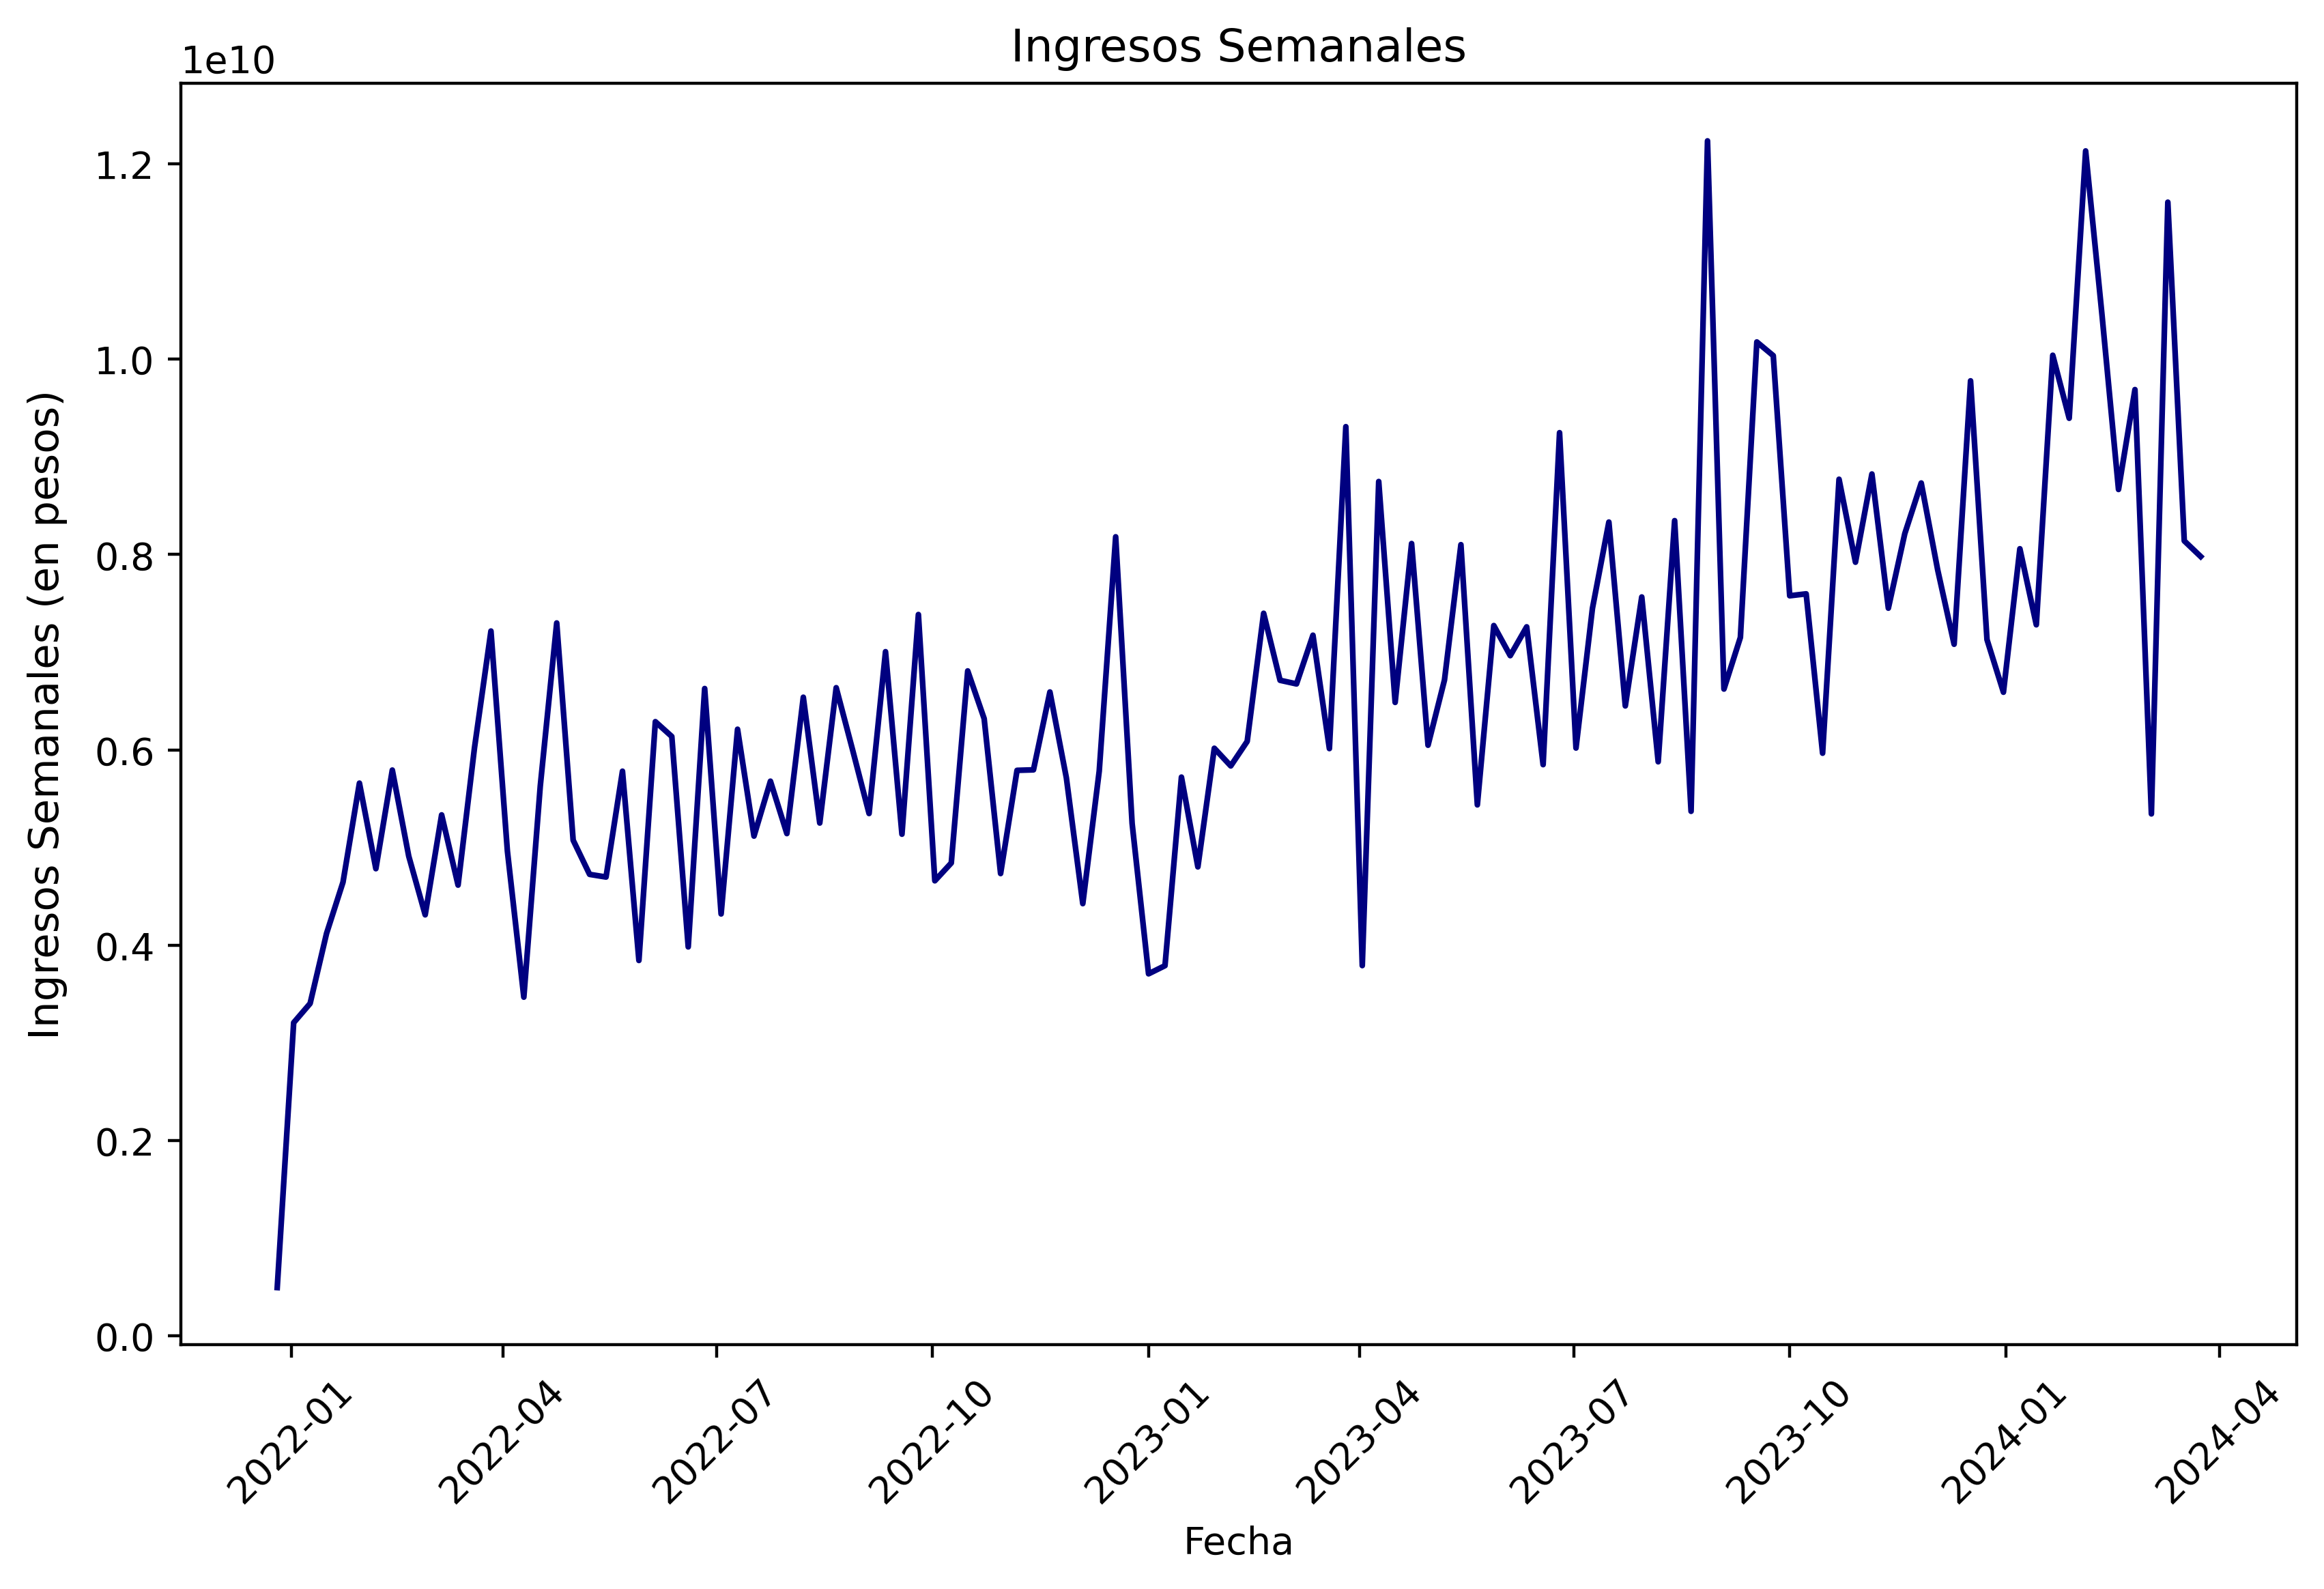

In [50]:
plt.figure(figsize=(10,6), dpi=400)

sns.lineplot(data=df_grouped, x='Fecha', y='Ingreso SEMANAL', color='navy')
plt.ylabel('Ingresos Semanales (en pesos)', size=11, labelpad=7)
plt.title('Ingresos Semanales')

plt.xticks(rotation=45)
plt.show()

#### La serie presenta tendencia y tal vez un componente estacional. En cualquier caso NO es estacionaria.

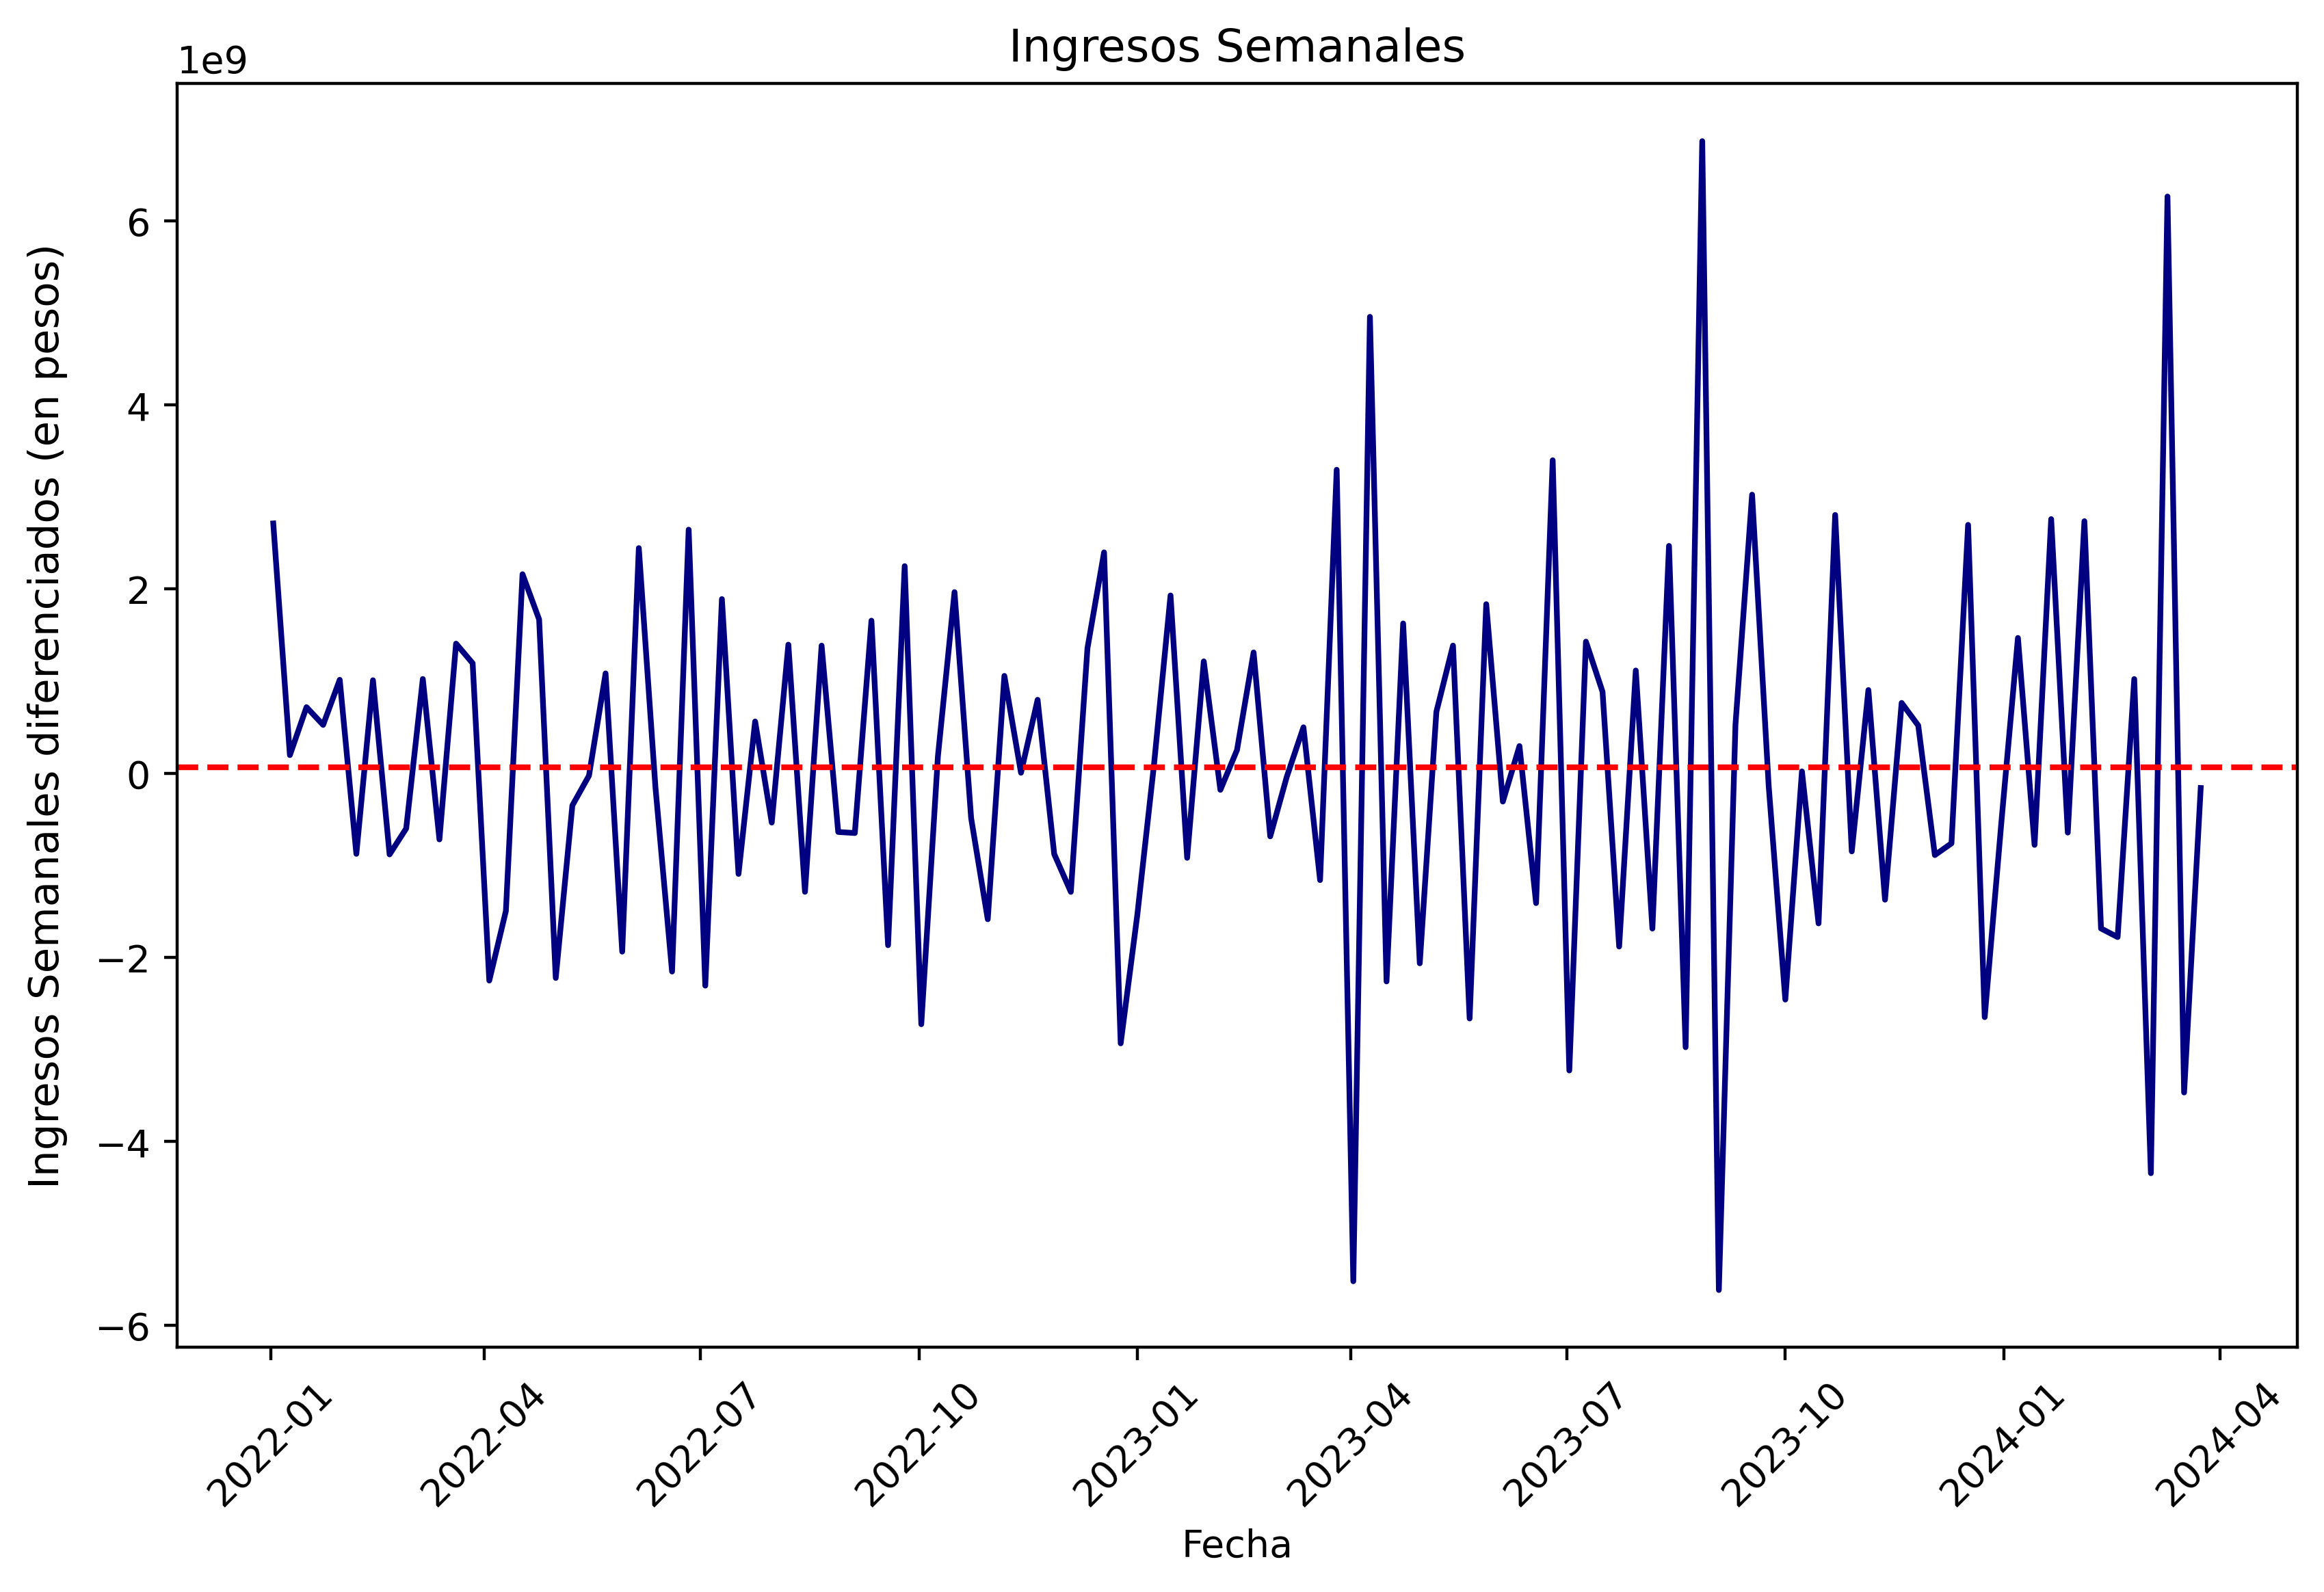

In [51]:
plt.figure(figsize=(10,6), dpi=400)


sns.lineplot(x=df_grouped['Fecha'][1:], y=df_grouped['Ingreso SEMANAL'].diff().dropna(),
             color='navy')
plt.ylabel('Ingresos Semanales diferenciados (en pesos)', size=11, labelpad=7)
plt.title('Ingresos Semanales')
plt.xticks(rotation=45)

mean_value = df_grouped['Ingreso SEMANAL'].diff().dropna().mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Value')
plt.show()

#### La serie presenta estacionariedad con algunos datos extremos a partir de abril de 2023

#### Apliquemos la descomposición estacional a la serie

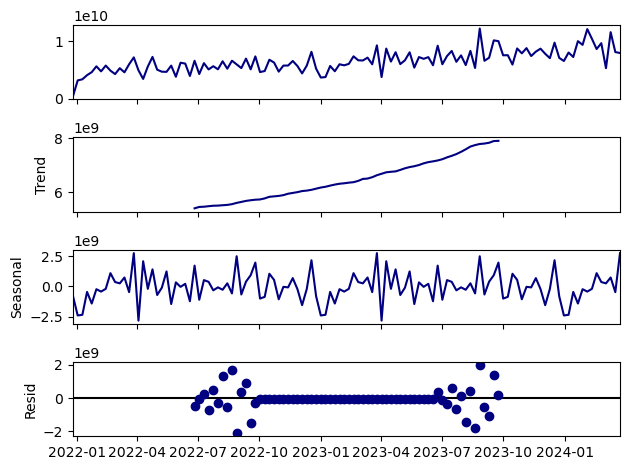

In [52]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva porque no es exponencial
date_range = df_grouped['Fecha']
data = df_grouped['Ingreso SEMANAL'].tolist()
time_series = pd.Series(data, index=date_range)

# Ejecutar descomposición estacional
decomposition = seasonal_decompose(time_series, model='additive')

# Plot the results

fig = decomposition.plot()
fig.axes[0].lines[0].set_color('Navy')    # Trend line
fig.axes[1].lines[0].set_color('Navy')   # Seasonal line
fig.axes[2].lines[0].set_color('Navy')  # Residual line
fig.axes[3].lines[0].set_color('Navy')  # Residual line

plt.show()

#### Claramente hay tendencia con periodicidad anual

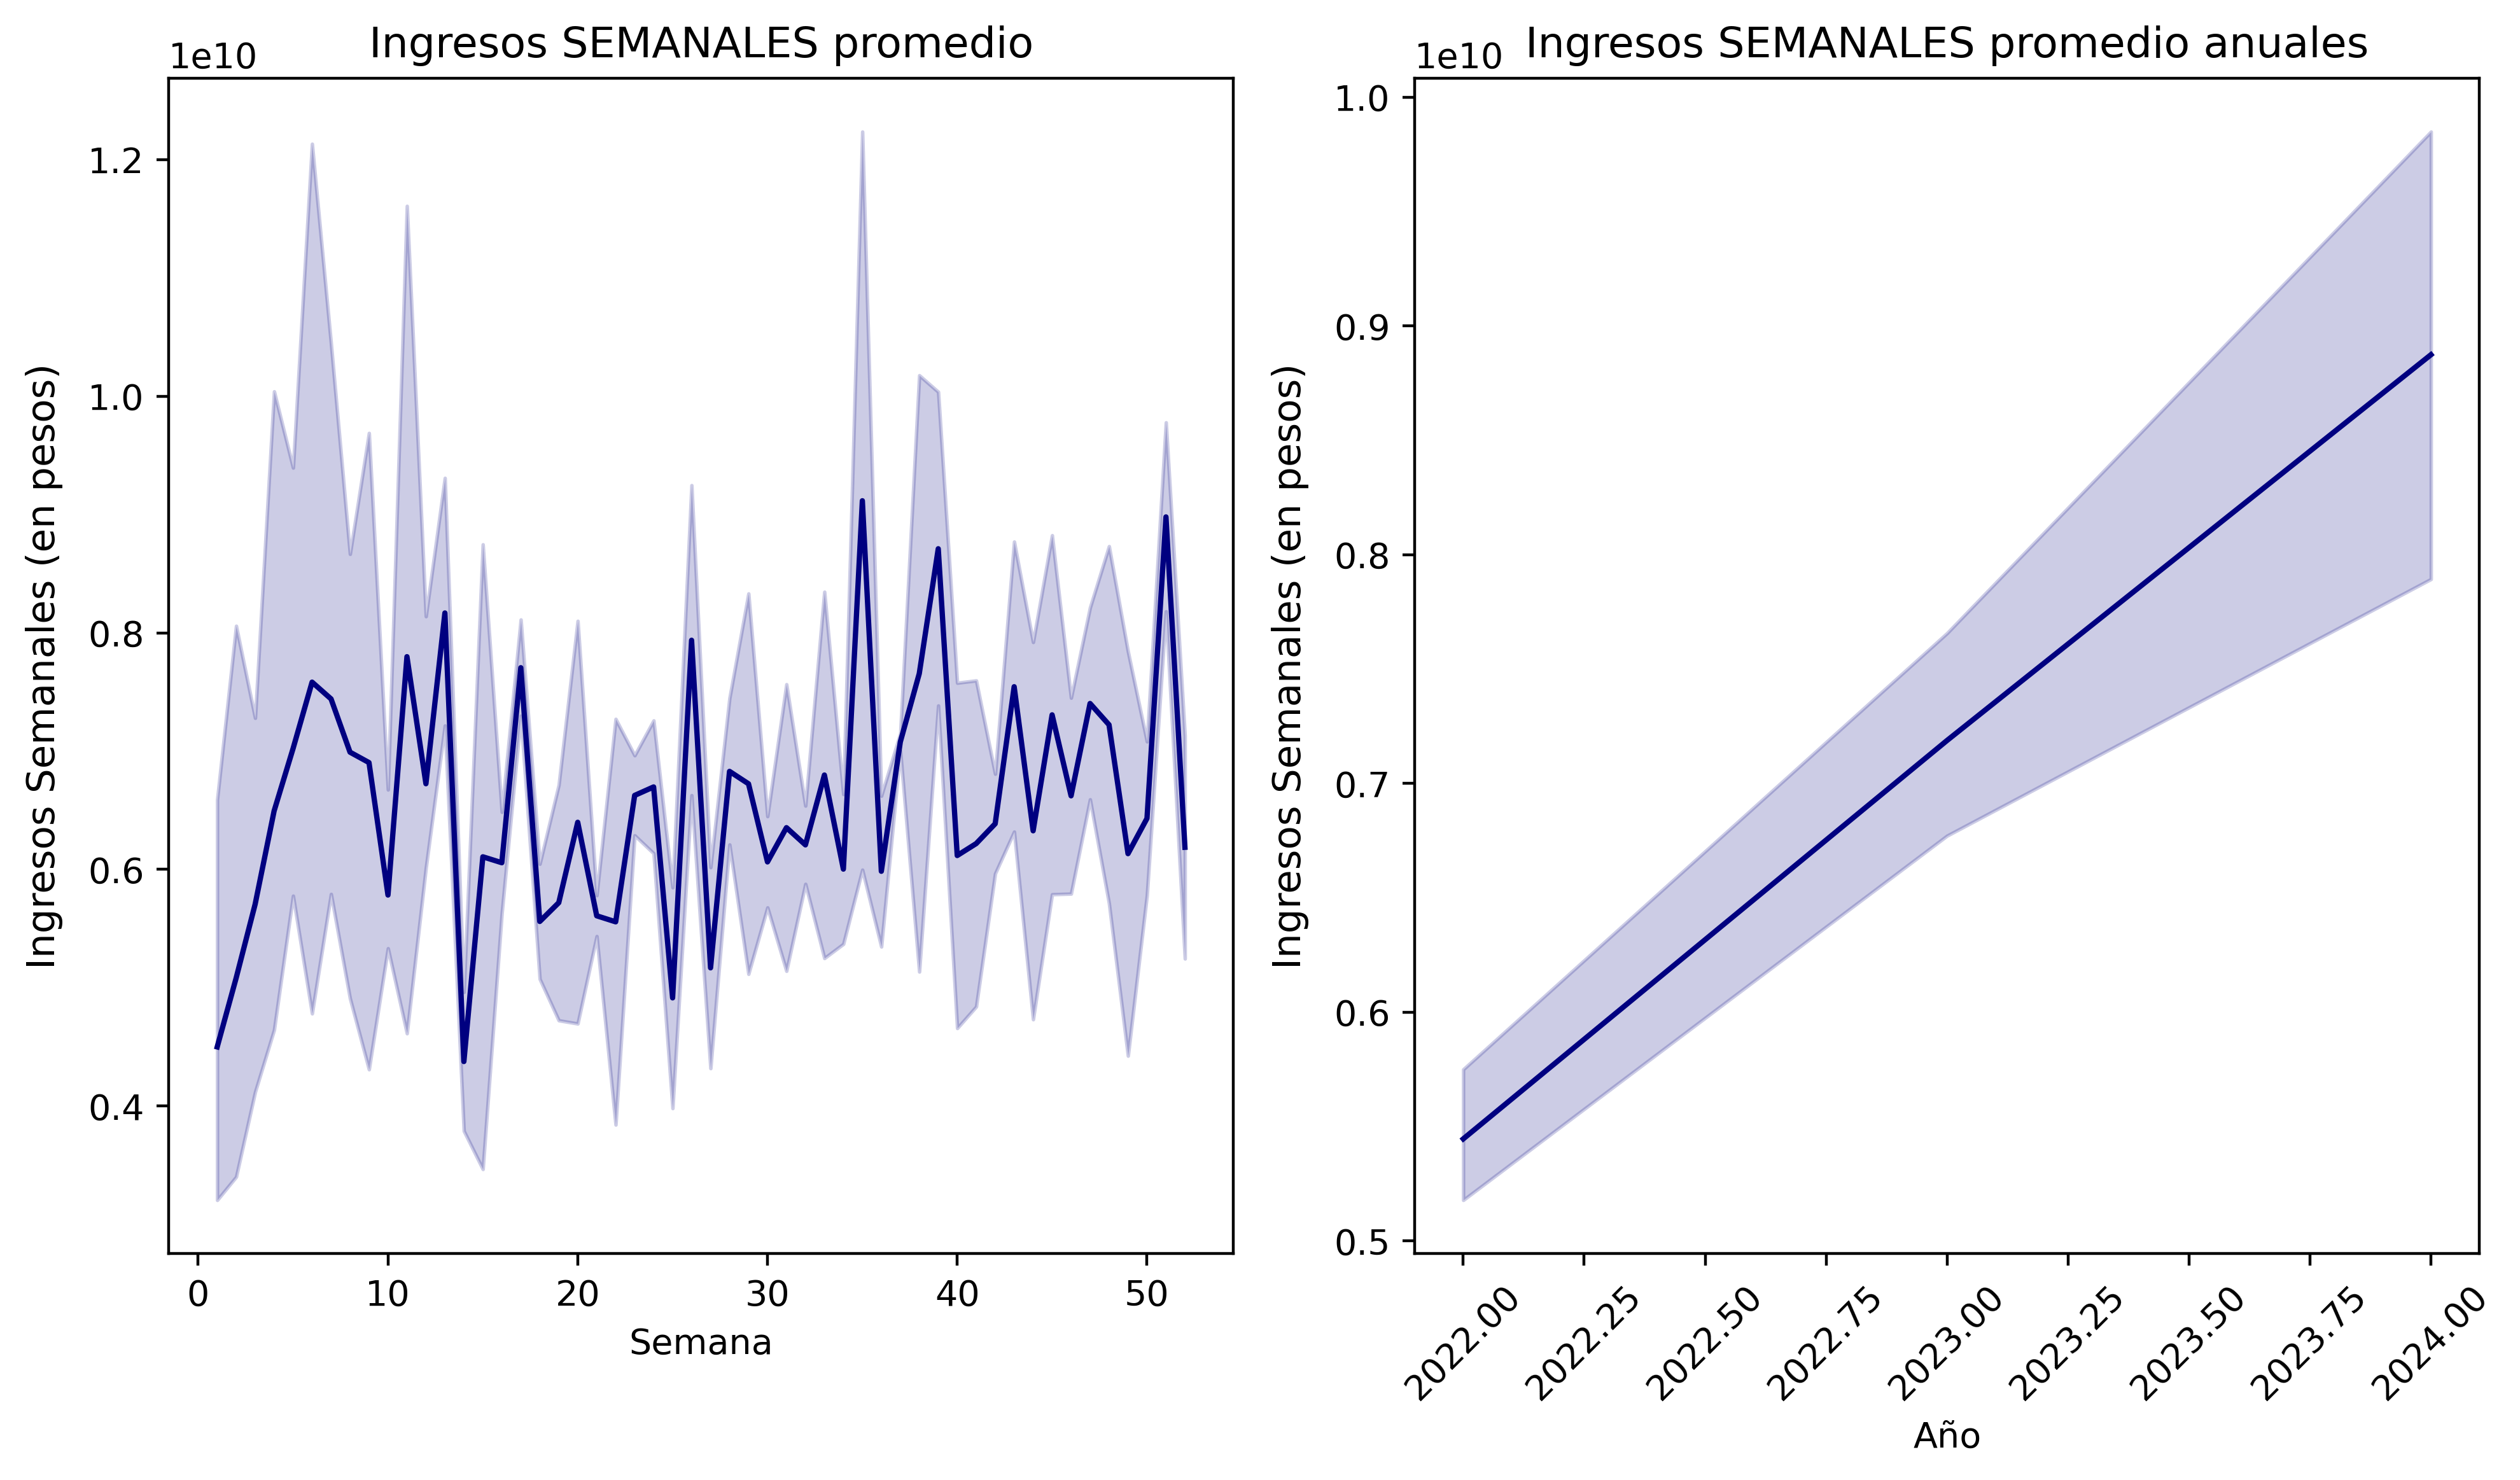

In [53]:
plt.figure(figsize=(10,6), dpi=400)

plt.subplot(1,2,1)
sns.lineplot(data=df_grouped.iloc[1:], x='Semana', y='Ingreso SEMANAL', color='navy')
plt.ylabel('Ingresos Semanales (en pesos)', size=11, labelpad=7)
plt.title('Ingresos SEMANALES promedio')

plt.subplot(1,2,2)
sns.lineplot(data=df_grouped[1:], x='Año', y='Ingreso SEMANAL', color='navy')
plt.xticks(rotation=45)
plt.ylabel('Ingresos Semanales (en pesos)', size=11, labelpad=7)
plt.title('Ingresos SEMANALES promedio anuales')


plt.tight_layout()
plt.show()

#### Realizar pruebas de Dickey-Fuller Aumentada y Kwiatkowski-Phillips-Schmidt-Shin

In [54]:
# Realizar la prueba de Dickey-Fuller Aumentada

def pruebas_ADF(t_serie):
    from statsmodels.tsa.stattools import adfuller
    print(('Prueba de Dickey-Fuller Aumentada').upper(), '\n'
          'Hipótesis Nula: NO hay Estacionariedad', '\n')
    
    # Serie original sin transformar
    result = adfuller(t_serie.dropna())
    print('Estadístico ADF: %f' % result[0])
    if result[1] >= 0.05:
        print('p-valor: %f' % result[1], '\n'
              'H0 no es rechazada', '\n'
              '*** La serie NO es estacionaria ***')
    else:
        print('p-valor: %f' % result[1], '\n'
              'H0 es rechazada', '\n'
              '*** La serie SÍ es estacionaria ***')
        
 ######################################################  ##############
# Realiza la prueba de Kwiatkowski-Phillips-Schmidt-Shin
def pruebas_KPSS(t_serie):
    
    from statsmodels.tsa.stattools import kpss

    print(('PRUEBA DE KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN').upper(), '\n',
          'Hipótesis Nula: HAY estacionariedad', '\n')
    # Serie original sin transformar
    result = kpss(t_serie.dropna())
    print('Estadístico KPSS: %f' % result[0])
    if result[1] < 0.05:
        print('p-valor: %f' % result[1], '\n'
              'H0 es rechazada', '\n'
              '*** La serie NO es estacionaria ***')
    else:
        print('p-valor: %f' % result[1], '\n'
              'H0 no es rechazada', '\n'
              '*** La serie SÍ es estacionaria ***')



In [55]:
print(f"SERIE ORIGINAL:")
prueba = pruebas_ADF(df_grouped['Ingreso SEMANAL'])
print()
print(f"SERIE DIFERENCIADA SEMANALMENTE:")
prueba = pruebas_ADF(df_grouped['Ingreso SEMANAL'].diff())
print()
print(f"SERIE DIFERENCIADA SEMANAL y ANUALMENTE:")
prueba = pruebas_ADF(df_grouped['Ingreso SEMANAL'].diff().diff(periods=12))

SERIE ORIGINAL:
PRUEBA DE DICKEY-FULLER AUMENTADA 
Hipótesis Nula: NO hay Estacionariedad 

Estadístico ADF: -1.995052
p-valor: 0.288747 
H0 no es rechazada 
*** La serie NO es estacionaria ***

SERIE DIFERENCIADA SEMANALMENTE:
PRUEBA DE DICKEY-FULLER AUMENTADA 
Hipótesis Nula: NO hay Estacionariedad 

Estadístico ADF: -5.064558
p-valor: 0.000017 
H0 es rechazada 
*** La serie SÍ es estacionaria ***

SERIE DIFERENCIADA SEMANAL y ANUALMENTE:
PRUEBA DE DICKEY-FULLER AUMENTADA 
Hipótesis Nula: NO hay Estacionariedad 

Estadístico ADF: -3.430384
p-valor: 0.009966 
H0 es rechazada 
*** La serie SÍ es estacionaria ***


In [56]:
print(f"SERIE ORIGINAL:")
prueba = pruebas_KPSS(df_grouped['Ingreso SEMANAL'])
print()
print(f"SERIE DIFERENCIADA SEMANALMENTE:")
prueba = pruebas_KPSS(df_grouped['Ingreso SEMANAL'].diff())
print()
print(f"SERIE DIFERENCIADA SEMANAL y ANUALMENTE:")
prueba = pruebas_KPSS(df_grouped['Ingreso SEMANAL'].diff().diff(periods=12))

SERIE ORIGINAL:
PRUEBA DE KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN 
 Hipótesis Nula: HAY estacionariedad 

Estadístico KPSS: 1.817174
p-valor: 0.010000 
H0 es rechazada 
*** La serie NO es estacionaria ***

SERIE DIFERENCIADA SEMANALMENTE:
PRUEBA DE KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN 
 Hipótesis Nula: HAY estacionariedad 

Estadístico KPSS: 0.144668
p-valor: 0.100000 
H0 no es rechazada 
*** La serie SÍ es estacionaria ***

SERIE DIFERENCIADA SEMANAL y ANUALMENTE:
PRUEBA DE KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN 
 Hipótesis Nula: HAY estacionariedad 

Estadístico KPSS: 0.092284
p-valor: 0.100000 
H0 no es rechazada 
*** La serie SÍ es estacionaria ***


#### Basándose en ambos test, se concluye que la serie original NO es estacionaria pero sí las series diferenciadas, Ahora haré los gráficos acf y pacf para la serie diferenciada semanalmente

#### Gráficos ACF y PACF

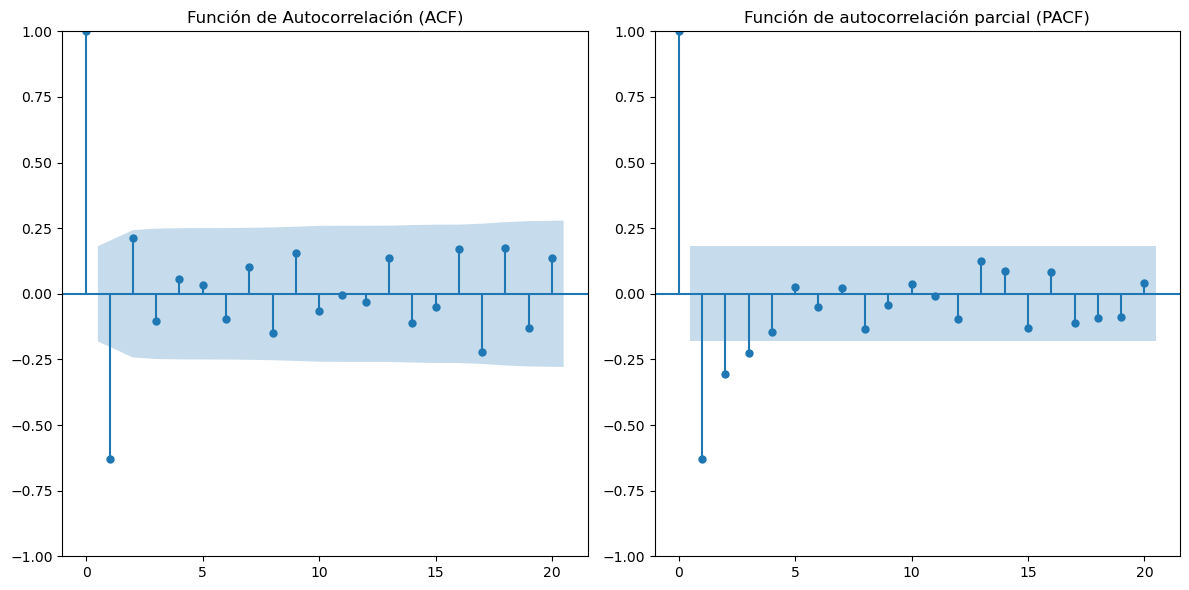

In [57]:
# importar módulos
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear la serie de tiempo diferenciada por semana
data = df_grouped['Ingreso SEMANAL'].diff().dropna()  
time_series = pd.Series(data)

# Crear gráficos ACF y PACF para la serie diferenciada
# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(time_series, lags=20, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(time_series, lags=20, ax=plt.gca())
plt.title('Función de autocorrelación parcial (PACF)')

plt.tight_layout()
plt.show()

#### Ambas funciones decaen rápidamente. Me sugiere un modelo ARIMA(1,1,1) o ARIMA(2,1,1) para la serie original. Veamos que elige pmdarima para la serie original, según el criterio AIC. Agregaremos el gráfico de la serie con la predicción  del modelo e intervalo de confianza.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5354.019, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5297.777, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5287.701, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5352.136, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5278.181, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5280.288, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5280.240, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5281.028, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5287.773, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5277.880, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5280.516, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5296.277, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5279.763, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

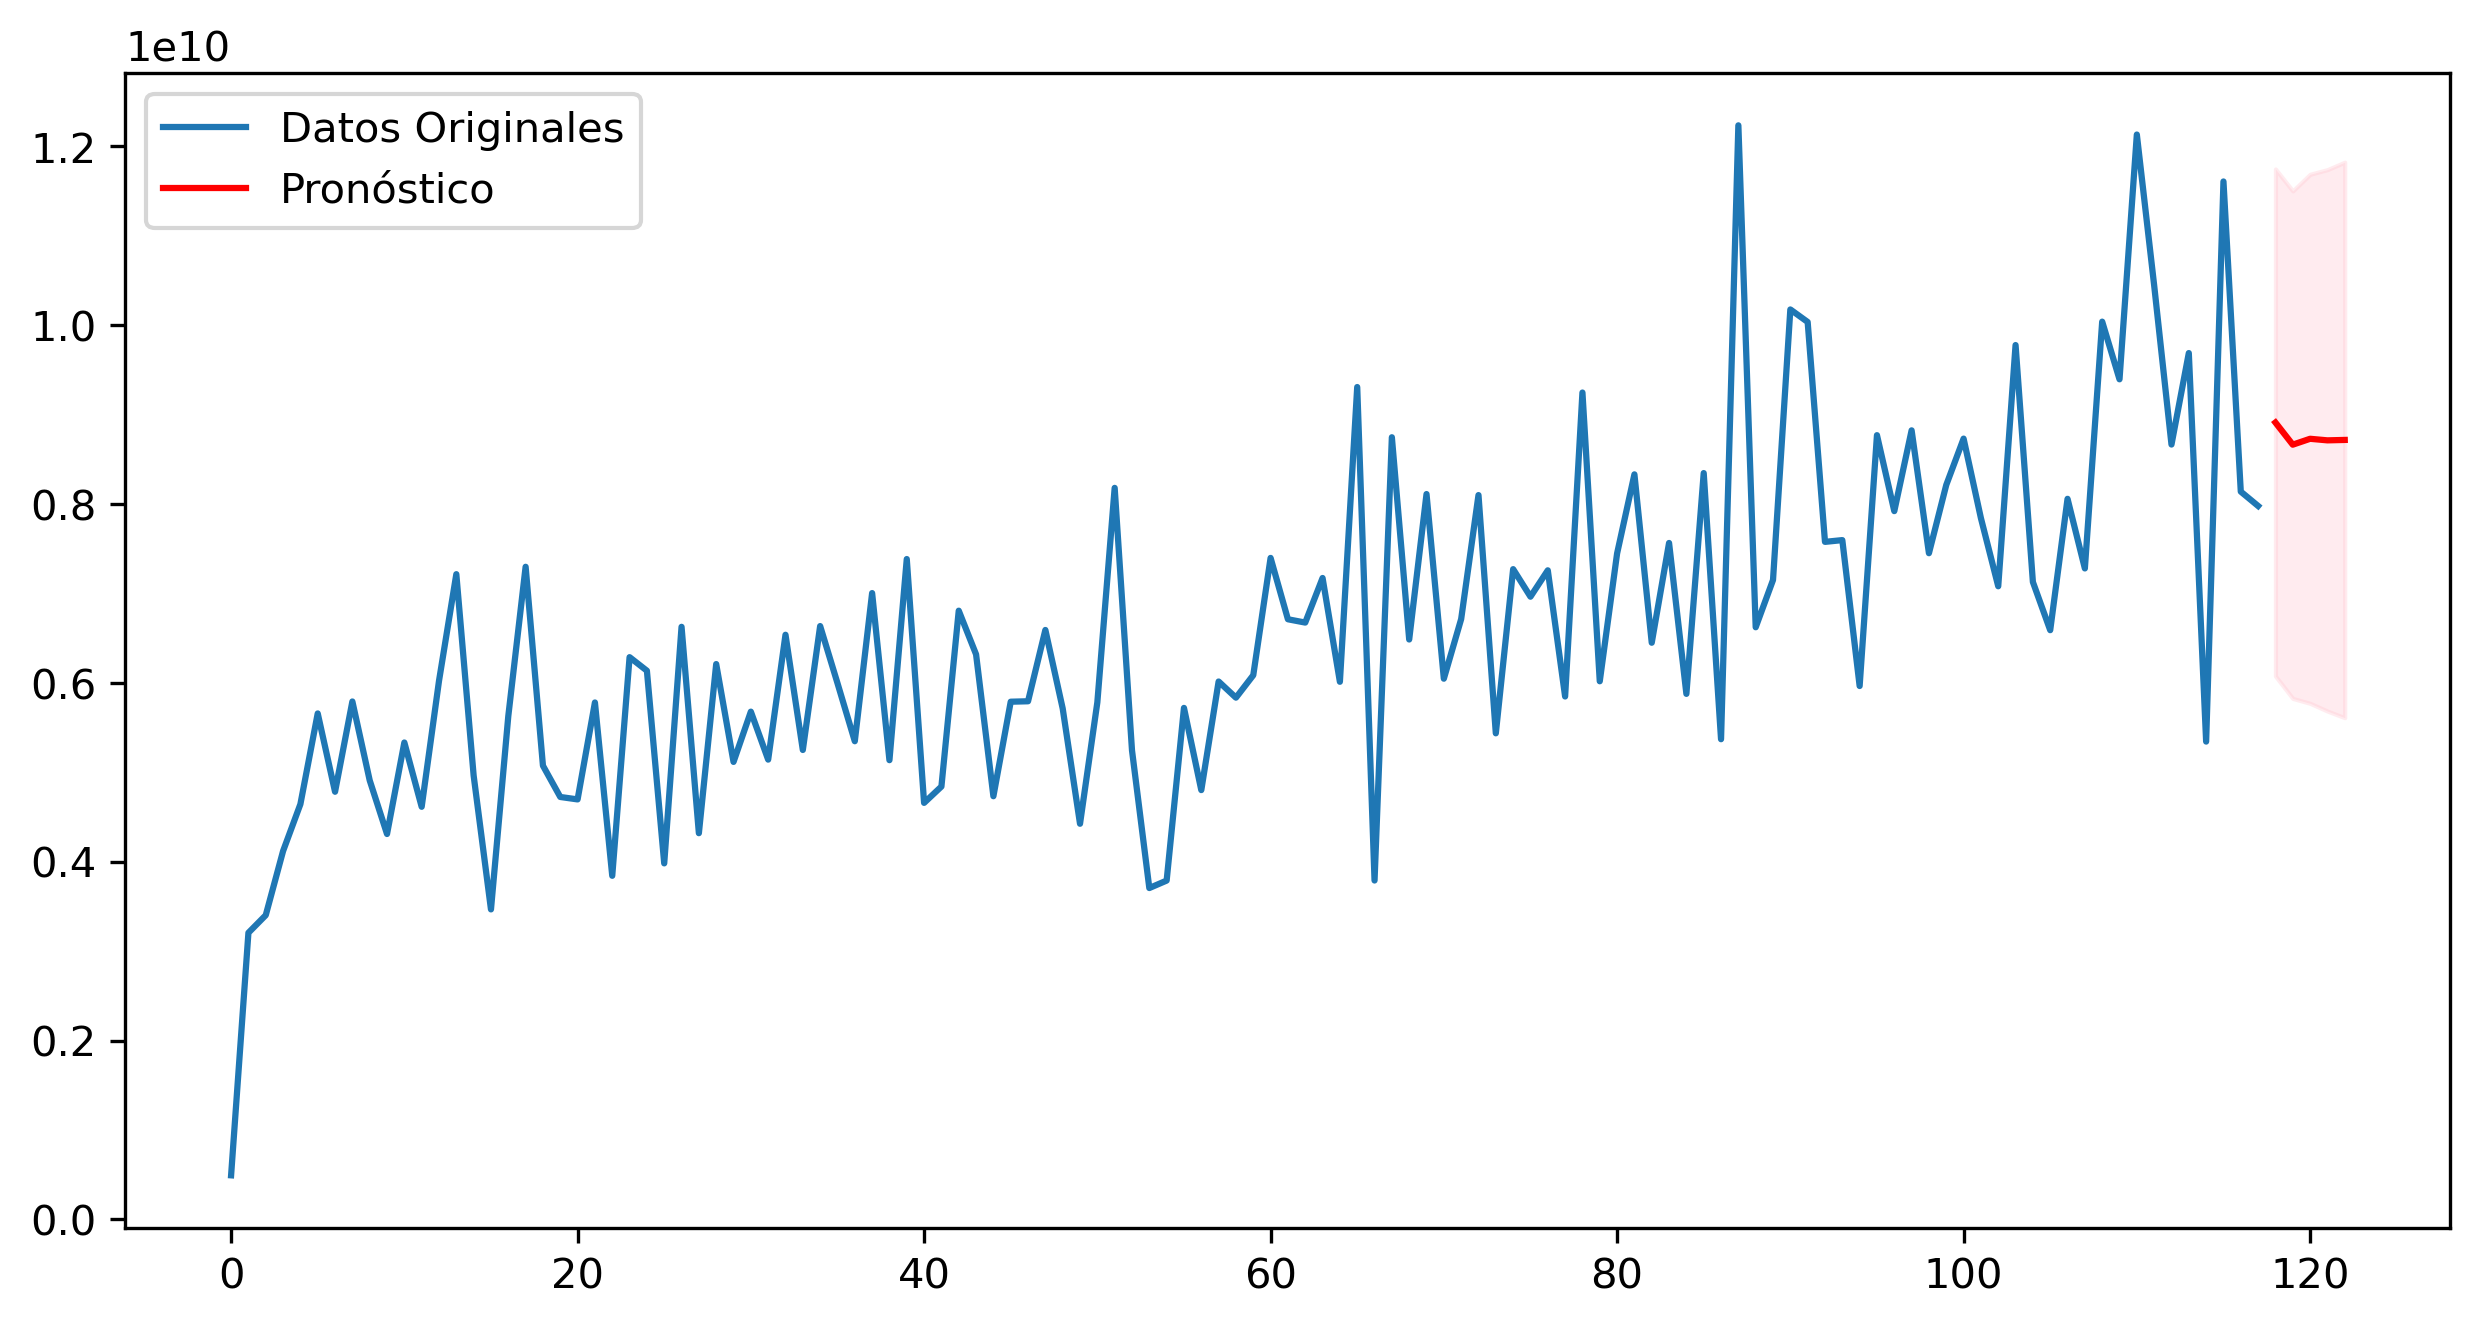

In [58]:
from pmdarima import auto_arima

data = df_grouped['Ingreso SEMANAL']
# Fit the auto_arima model
model = auto_arima(data, seasonal=False, stepwise=True, trace=True)

# Summary of the model
print(model.summary())

# Forecasting
n_periods = 5
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plotting the results
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(pd.Series(data).index, pd.Series(data), label='Datos Originales')
plt.plot(range(len(data), len(data) + n_periods), forecast, label='Pronóstico', color='red')
plt.fill_between(range(len(data), len(data) + n_periods), 
                 conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

#### Observemos que mediante auto_arima del paquete pmdarima obtuvimos el modelo con componente estacional ARIMA(1,1,1)

#### Apliquemos la validación cruzada 

In [59]:
def rolling_cross_validation(data, model_order, initial_train_size, test_size):
    
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_absolute_error
    
    predictions = []
    actuals = []
    
    for start in range(initial_train_size, len(data) - test_size + 1):
        train = data.iloc[:start]
        test = data.iloc[start:start + test_size]
        
        model = ARIMA(train, order=model_order)
        results = model.fit()
        
        pred = results.forecast(steps=test_size)
        predictions.extend(pred)
        actuals.extend(test.values.flatten())
    
    return np.array(predictions), np.array(actuals)


In [60]:
# Definir los parámetros
model_order = (1, 1, 1)
initial_train_size = int(len(data)*0.75)  # tamaño de entrenamiento inicial
test_size = 1  # Número de períodos por pronosticar

# Ejecutar la validación cruzada
predictions, actuals = rolling_cross_validation(df_grouped['Ingreso SEMANAL'],
                                                model_order,
                                                initial_train_size, test_size)

In [61]:
# Guardar dataframe como archivo xlsx
# df_arima1_pred.to_excel('arima1_pred.xlsx', index=False)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calcular raíz del error cuadrático medio
mse = mean_squared_error(actuals, predictions)
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')
           
# Calcular error absoluto medio
mae = mean_absolute_error(actuals, predictions)
print(f'Mean absolute Error: {mae:.2f}')

Root Mean Squared Error: 1694462535.21
Mean absolute Error: 1330681092.45


#### Se interpreta el resultado así: el modelo se equivoca en promedio por COP 1.694.462.535 (rmse) O COP  1.330.681.092 (mae).

In [63]:
# Calcular Raíz del error porcentual Cuadrático Medio
mse = mean_squared_error(actuals/actuals, predictions/actuals)
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')

# Calcular error porcentual abosluto Medio
mae = mean_absolute_error(actuals/actuals, predictions/actuals)
print(f'Mean Absolute Error: {mae:.2f}')

# Calcular  Raíz del error porcentual Cuadrático Medio/promedio
mse = mean_squared_error(actuals, predictions)
print(f'Mean Absolute Error/actuals_mean: {np.sqrt(mse)/actuals.mean():.2f}')

Root Mean Squared Error: 0.22
Mean Absolute Error: 0.16
Mean Absolute Error/actuals_mean: 0.20


#### Se interpreta el resultado así: el modelo se equivoca en promedio 22% o 16% o 20%, según el índice utilizado

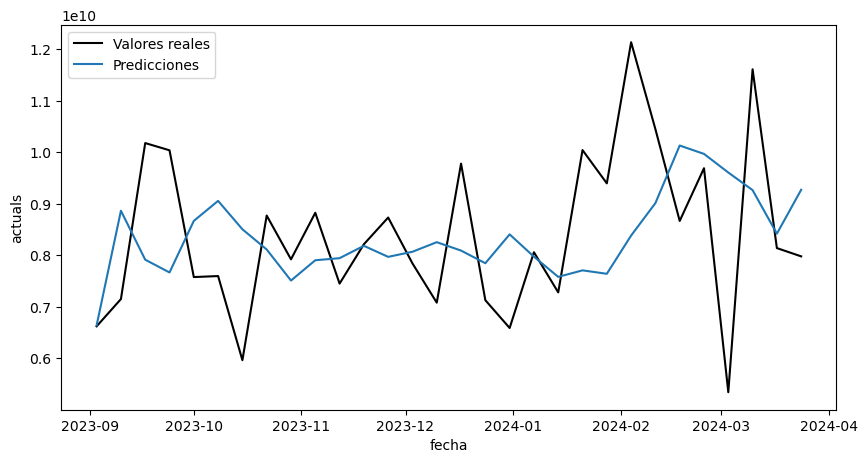

In [64]:
# Graficar predicciones y valores reales

df = pd.DataFrame({
    'actuals':actuals,
    'predictions': predictions,
    'fecha': df_grouped['Fecha'].iloc[initial_train_size:]
})


plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df['fecha'], y='actuals', color='black', label='Valores reales')
sns.lineplot(data=df, x=df['fecha'], y='predictions', label='Predicciones')
plt.show()

#### Repito el análisis con ARIMA(2,1,0)

In [65]:
# Define model parameters
model_order = (2, 1, 1)
initial_train_size = int(len(data)*0.75)  # Initial training size
test_size = 1  # Number of periods to forecast

# Perform rolling cross-validation
predictions, actuals = rolling_cross_validation(df_grouped['Ingreso SEMANAL'],
                                                model_order,
                                                initial_train_size, test_size)

In [66]:
# Calcular raíz del error cuadrático medio
mse = mean_squared_error(actuals, predictions)
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')

# Calcular error absoluto medio
mae = mean_absolute_error(actuals, predictions)
print(f'Mean squared Error: {mae:.2f}')

Root Mean Squared Error: 1720427991.68
Mean squared Error: 1339504326.90


#### Se interpreta el resultado así: el modelo se equivoca en promedio por COP 1.720.427.991 (rmse) O COP 1.339.504.326  (mae).

In [67]:
# Calcular Raíz del error porcentual Cuadrático Medio
mse = mean_squared_error(actuals/actuals, predictions/actuals)
print(f'Root Mean Squared Error: {np.sqrt(mse):.2f}')

# Calcular error porcentual abosluto Medio
mae = mean_absolute_error(actuals/actuals, predictions/actuals)
print(f'Mean Absolute Error: {mae:.2f}')

# Calcular  Raíz del error porcentual Cuadrático Medio/promedio
mse = mean_squared_error(actuals, predictions)
print(f'Mean Absolute Error/actuals_mean: {np.sqrt(mse)/actuals.mean():.2f}')

Root Mean Squared Error: 0.23
Mean Absolute Error: 0.16
Mean Absolute Error/actuals_mean: 0.20


#### Se interpreta el resultado así: el modelo se equivoca en promedio 23% o 16% o 20%, según el índice utilizado

In [68]:
Resumen = pd.DataFrame({
    'Medida': ['rmse', 'mae', 'rmpce', 'mape', 'n_rmse'],
    'Arima(1,1,1)' : [1694462535, 1330681092, '22 %', '16 %', '20 %'],
    'Arima(2,1,1)' : [1720427991, 1339504326, '23 %', '16 %', '20 %']
                      })

Resumen = Resumen.set_index('Medida')
Resumen

,"Arima(1,1,1)","Arima(2,1,1)"
Medida,,
rmse,1694462535,1720427991
mae,1330681092,1339504326
rmpce,22 %,23 %
mape,16 %,16 %
n_rmse,20 %,20 %


### Es momento de hacer conclusiones. Ambos modelos arima presentan una calidad de predicción muy similar, pero el rmse del arima(1,1,1) es un poco mejor, por lo tanto lo elijo. El modelo nos dice que el valor futuro de los ingresos semanales dependen principalmente de la semana anterior y del error de predicción también de la semana anterior. En promedio se equivoca un 20% del valor que debe predecir